# Midterm Review

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [269]:
from scipy.special import comb
from scipy.stats import binom
from itertools import combinations
from numpy.random import rand

In [321]:
%config InlineBackend.figure_format = "retina"

## Question 1

In [322]:
A = np.array([
    [0, 1, 0, 1, 0, 0],
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 1, 0, 0],
    [1, 1, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 1, 0]
])

# out-degree
A.sum(axis=0)

array([2, 3, 1, 2, 1, 1])

In [323]:
# in-degree
A.sum(axis=1)

array([2, 1, 2, 3, 1, 1])

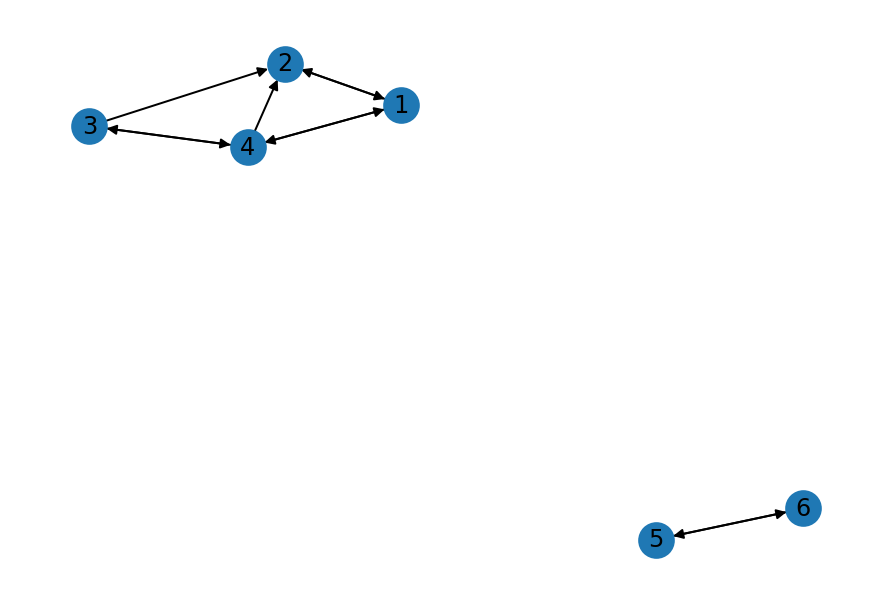

In [331]:
G = nx.DiGraph(A)
G = nx.relabel.relabel_nodes(G, {i: i+1 for i in range(6)})
nx.draw(G, with_labels=True)

In [344]:
H = np.array([
    [0, 1, 0, 1, 0, 1],
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 1, 0, 0],
    [1, 1, 1, 0, 0, 0],
    [1, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 1, 0]
])

Gh = nx.DiGraph(H)
Gh = nx.relabel_nodes(Gh, {i: i+1 for i in range(6)})

In [345]:
for node, path in nx.all_pairs_shortest_path_length(Gh):
    print(node, path)

1 {1: 0, 2: 1, 4: 1, 6: 1, 3: 2, 5: 2}
2 {2: 0, 1: 1, 4: 2, 6: 2, 3: 3, 5: 3}
3 {3: 0, 2: 1, 4: 1, 1: 2, 6: 3, 5: 4}
4 {4: 0, 1: 1, 2: 1, 3: 1, 6: 2, 5: 3}
5 {5: 0, 1: 1, 6: 1, 2: 2, 4: 2, 3: 3}
6 {6: 0, 5: 1, 1: 2, 2: 3, 4: 3, 3: 4}


## Question 2

In [289]:
N = 6
p = 0.3

k = 4

In [290]:
binom.pmf(k, N, p)

0.05953499999999999

In [291]:
comb(N-1, k)

5.0

In [292]:
def Gb(N, p):
    links = [link for link in combinations(range(N), 2) if rand() > p]
    return links

In [309]:
n_rounds = 10_000

p_vec = np.zeros(n_rounds)
for n in range(n_rounds):
    G = nx.from_edgelist(Gb(N, p))
    pv = np.array(G.degree)[:, 1]
    pv = (pv == k).any()
    p_vec[n] = pv

In [310]:
G = nx.from_edgelist(Gb(N, p))
np.array(G.degree)[:, 1]

array([5, 4, 2, 2, 3, 2])

In [311]:
p_vec.mean()

0.9044